# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Data Acquisition

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
# missing values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(31962, 3)

# EDA

In [8]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

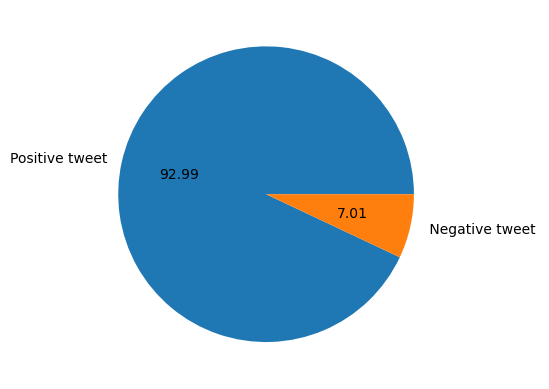

In [10]:
#data distribution
plt.pie(df['label'].value_counts(), labels=['Positive tweet',' Negative tweet '],autopct="%0.2f")
plt.show()

In [11]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
df['num_characters'] = df['tweet'].apply(len)
df.head()

,id,label,tweet,num_characters
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [13]:
# num of words
df['num_words'] = df['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,id,label,tweet,num_characters,num_words
0,1,0,@user when a father is dysfunctional and is s...,102,21
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27
2,3,0,bihday your majesty,21,3
3,4,0,#model i love u take with u all the time in ...,86,18
4,5,0,factsguide: society now #motivation,39,6


In [14]:
df['num_sentences'] = df['tweet'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,id,label,tweet,num_characters,num_words,num_sentences
0,1,0,@user when a father is dysfunctional and is s...,102,21,2
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27,2
2,3,0,bihday your majesty,21,3,1
3,4,0,#model i love u take with u all the time in ...,86,18,2
4,5,0,factsguide: society now #motivation,39,6,1


In [15]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,31962.000000,31962.000000,31962.000000
mean,84.739628,18.020055,1.620643
std,29.455749,6.783308,0.789295
min,11.000000,3.000000,1.000000
25%,63.000000,13.000000,1.000000
50%,88.000000,18.000000,1.000000
75%,108.000000,23.000000,2.000000
max,274.000000,121.000000,11.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

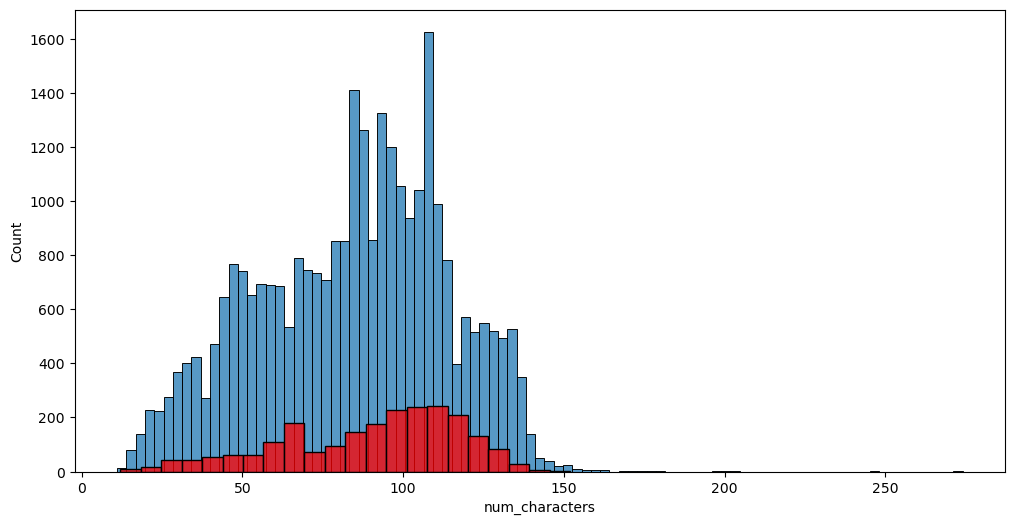

In [16]:
#plot of num_characters of email text
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

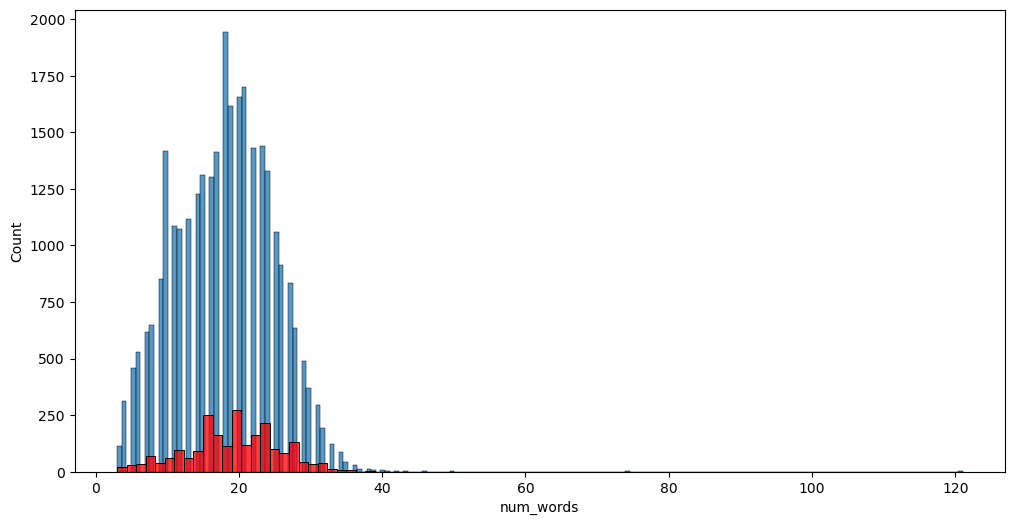

In [17]:
#plot of num_words of email text
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

# Data Cleaning and Preprocessing

In [18]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [19]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,id,label,tweet,num_characters,num_words,num_sentences,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,21,2,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27,2,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,21,3,1,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,18,2,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,39,6,1,factsguide: society now #motivation


In [20]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,num_characters,num_words,num_sentences,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,21,2,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27,2,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,21,3,1,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,18,2,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,39,6,1,factsguide society now #motivation


In [21]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [22]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,num_characters,num_words,num_sentences,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,21,2,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27,2,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,21,3,1,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,86,18,2,#model love take with time
4,5,0,factsguide: society now #motivation,39,6,1,factsguide society #motivation


In [23]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [24]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [25]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,num_characters,num_words,num_sentences,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,21,2,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27,2,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,21,3,1,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,86,18,2,#model love take with time
4,5,0,factsguide: society now #motivation,39,6,1,factsguid societi #motiv


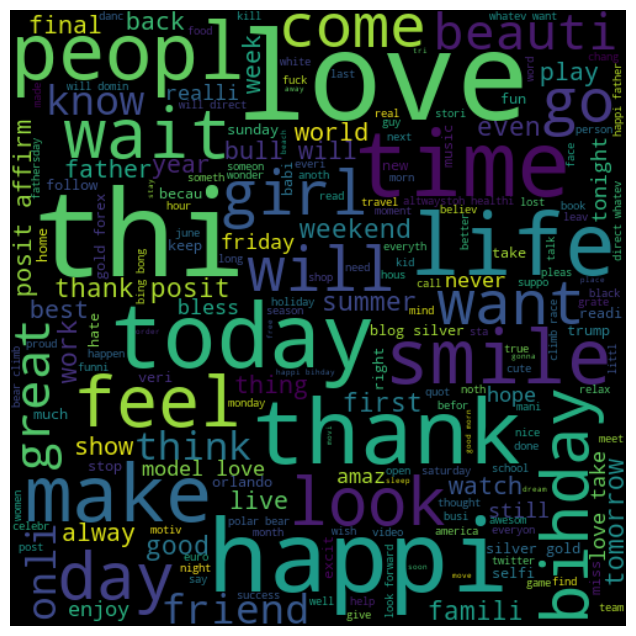

In [33]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

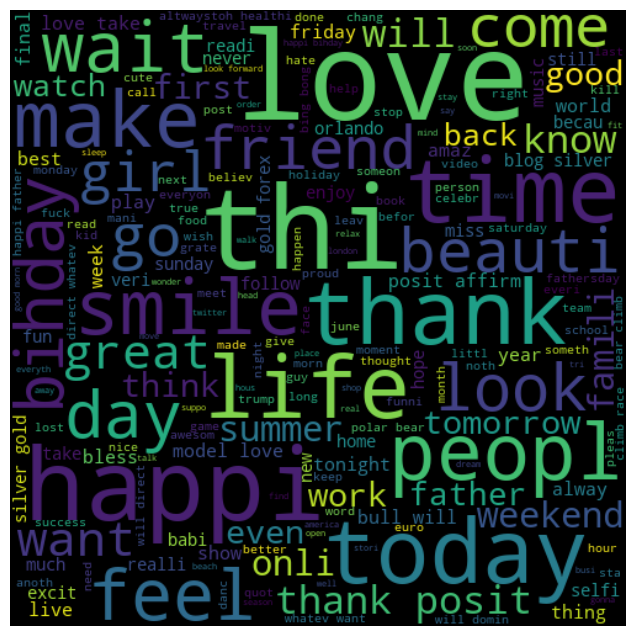

In [34]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=500, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

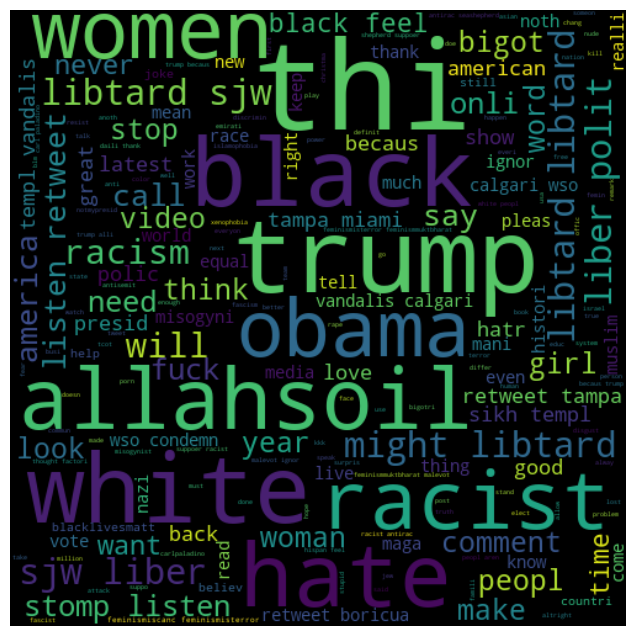

In [35]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=500, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [37]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [38]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [39]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [40]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [41]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [44]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


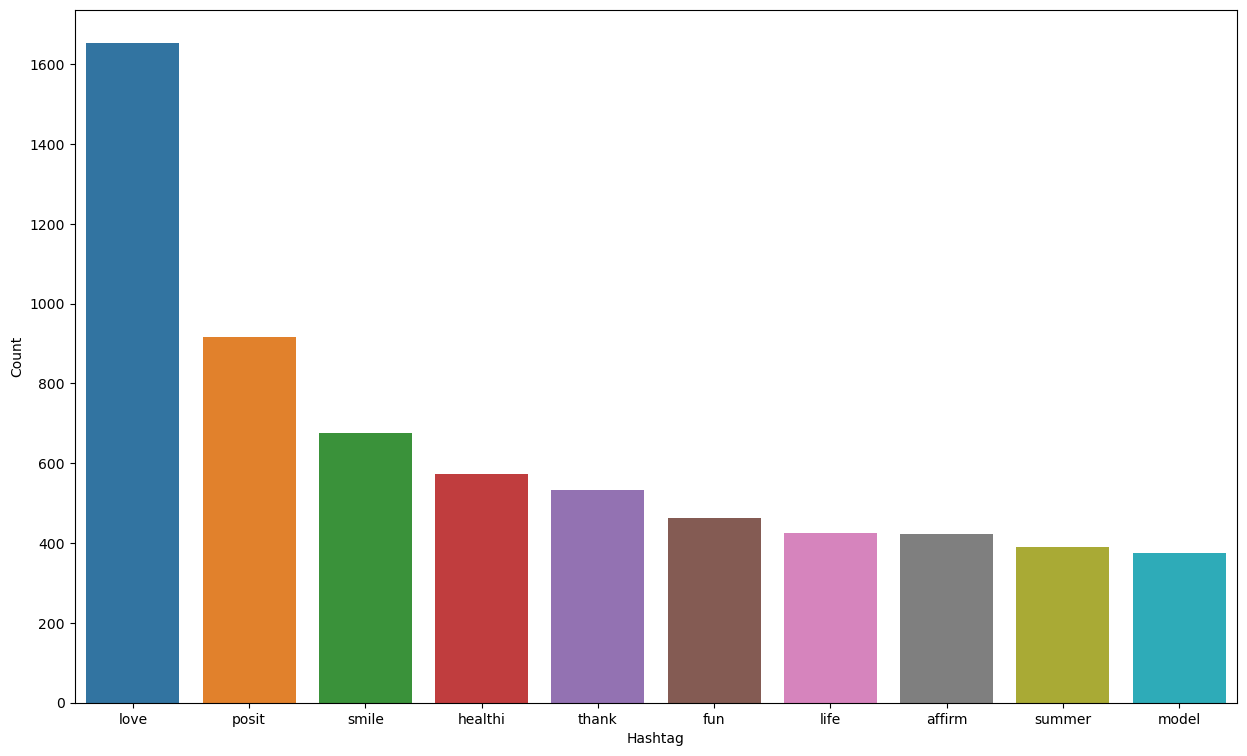

In [45]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [46]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


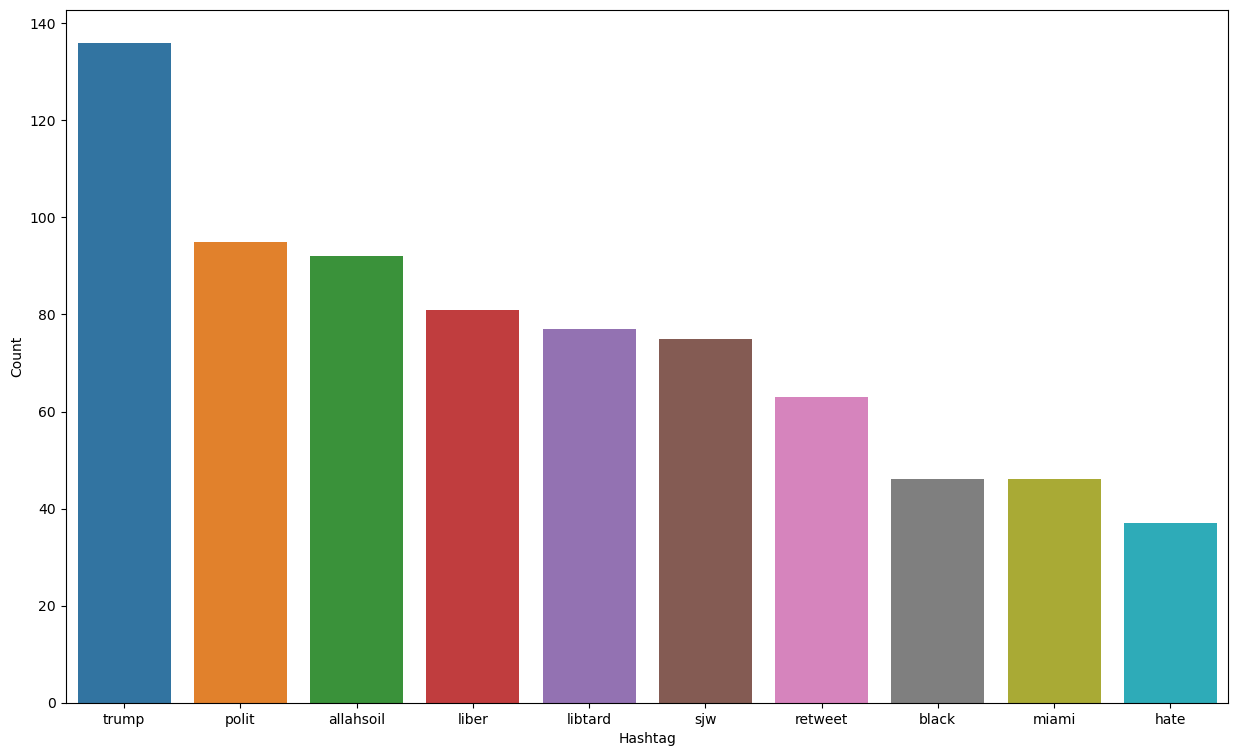

In [47]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# Train Test Split

In [49]:
df.head()

,id,label,tweet,num_characters,num_words,num_sentences,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,102,21,2,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27,2,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,21,3,1,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,86,18,2,#model love take with time
4,5,0,factsguide: society now #motivation,39,6,1,factsguid societi #motiv


In [50]:
from sklearn.model_selection import train_test_split
X = df.clean_tweet
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25569,), (6393,), (25569,), (6393,))

# Applying Logistic Regression

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")
print(classification_report(y_pred1,y_test))

Accuracy is : 0.9471296730799311
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6239
           1       0.30      0.88      0.45       154

    accuracy                           0.95      6393
   macro avg       0.65      0.92      0.71      6393
weighted avg       0.98      0.95      0.96      6393



# Applying Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_pred,y_test))

accuracy 0.9408728296574378
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6315
           1       0.17      1.00      0.29        78

    accuracy                           0.94      6393
   macro avg       0.59      0.97      0.63      6393
weighted avg       0.99      0.94      0.96      6393



# Applying Xgboost Classifier

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label1'] = encoder.fit_transform(df['label'])
df.head()

,id,label,tweet,num_characters,num_words,num_sentences,clean_tweet,label1
0,1,0,@user when a father is dysfunctional and is s...,102,21,2,when father dysfunct selfish drag kid into dys...,0
1,2,0,@user @user thanks for #lyft credit i can't us...,122,27,2,thank #lyft credit caus they offer wheelchair ...,0
2,3,0,bihday your majesty,21,3,1,bihday your majesti,0
3,4,0,#model i love u take with u all the time in ...,86,18,2,#model love take with time,0
4,5,0,factsguide: society now #motivation,39,6,1,factsguid societi #motiv,0


In [56]:
from sklearn.model_selection import train_test_split
X = df.clean_tweet
y = df.label1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [57]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_pred,y_test))

accuracy 0.9516658845612389
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6162
           1       0.41      0.82      0.55       231

    accuracy                           0.95      6393
   macro avg       0.70      0.89      0.76      6393
weighted avg       0.97      0.95      0.96      6393



# Applying Random forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_pred,y_test))

accuracy 0.9604254653527295
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6116
           1       0.53      0.87      0.65       277

    accuracy                           0.96      6393
   macro avg       0.76      0.92      0.82      6393
weighted avg       0.97      0.96      0.96      6393



# Smote for balancing data

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Text preprocessing (TF-IDF vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
X = tfidf_vectorizer.fit_transform(df['clean_tweet'])

# Encoding target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

In [60]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification

# Create an instance of SMOTE-ENN resampler
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)

# Resample the dataset using SMOTE-ENN
X_resampled, y_resampled = smote_enn.fit_resample(X , y )

# Check the class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution after SMOTE-ENN resampling:")
print(class_distribution)

Class distribution after SMOTE-ENN resampling:
{0: 14718, 1: 28116}


# Train Test Split after balancing data

In [62]:
from sklearn.model_selection import train_test_split
X = df.clean_tweet
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 42)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((34267, 1000), (8567, 1000), (34267,), (8567,))

# Applying Logistic Regression after balancing data

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")
print(classification_report(y_pred1,y_test))

Accuracy is : 0.9484066767830045
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2682
           1       0.99      0.94      0.96      5885

    accuracy                           0.95      8567
   macro avg       0.93      0.95      0.94      8567
weighted avg       0.95      0.95      0.95      8567



# Applying Naive Bayes Classifier after balancing data

In [66]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_pred,y_test))

accuracy 0.9333488969300805
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2565
           1       0.98      0.92      0.95      6002

    accuracy                           0.93      8567
   macro avg       0.91      0.94      0.92      8567
weighted avg       0.94      0.93      0.93      8567



# Applying Xgboost Classifier after balancing data

In [67]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label1'] = encoder.fit_transform(df['label'])

In [68]:
from sklearn.model_selection import train_test_split
X = df.clean_tweet
y = df.label1
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 42)

In [69]:
from xgboost import XGBClassifier

xgboost = Pipeline([
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_pred,y_test))

accuracy 0.9307809034667912
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2519
           1       0.99      0.91      0.95      6048

    accuracy                           0.93      8567
   macro avg       0.91      0.94      0.92      8567
weighted avg       0.94      0.93      0.93      8567



# Applying Random forest classifier after balancing data

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = Pipeline([
               ('clf', RandomForestClassifier()),
              ])

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
from sklearn.ensemble import RandomForestClassifier

rf_classifier = Pipeline([
               ('clf', RandomForestClassifier()),
              ])

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_pred,y_test))

accuracy 0.9815571378545582
accuracy 0.9815571378545582
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2844
           1       1.00      0.98      0.99      5723

    accuracy                           0.98      8567
   macro avg       0.97      0.98      0.98      8567
weighted avg       0.98      0.98      0.98      8567

